# ACT or SAT? That is a question

## Background: <br>
Accordind to a 2015 reserch done by Hanover Research , (https://www.hartlandschools.us/documents/curriculum/PLAN-PSAT-ACT-SAT%20Assessment%20Correlations%20-%20Washtenaw%20ISD%202015.pdf) ,
"even with small sample sizes, ACT performance is strongly predictive of SAT performance,
and this relationship is statistically significant at the 99 percent level". <br>

Based on this reserch, we assume that both ACT and SAT score can equivalently reflect a student's acadimic capability. In other words, student who scores high on SAT tends to score high in ACT as well and we assume students who take ACT and SAT are in same level, i.e it's not that bad students prefer ACT and good student freper SAT etc.)

## Problem statement
I work for a school district that has asked me to advise their high school students on what SAT or ACT score they should be aiming for based on their intended area of study or school preferences. Due to tightness of timeline, students can not take both exams. So they have to make the correct choice.

## Data processing

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats as stats 
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import OLSInfluence as olsi
from sklearn.linear_model import LinearRegression
from sklearn import metrics

https://www.analyze-ed.com/average-act-score.html

In [2]:
df1 = pd.read_csv('SAT.csv')
act = pd.read_csv('ACT.csv',sep='\t').iloc[:-1]
acceptance = pd.read_csv('sat_act_by_college.txt')

In [3]:
def insert(df,i,j,df_add):
    df1 = df.iloc[:i,:]
    df2 = df.iloc[j:,:]
    df_new = pd.concat([df1,df_add,df2],ignore_index=True)
    return df_new

In [4]:
d = {"Degree-level goal and intended college major": "Sciences: Biological & Physical", \
     'Total SAT':df1.iloc[12:16,1:].mean()}
df_add = pd.DataFrame(data=d)

sat = insert(df1,12,16,df_add)

sat
#df.merge()

,Degree-level goal and intended college major,Total SAT
0,Agriculture,968.00
1,Architecture,1042.00
2,Arts: Visual & Performing,1047.00
3,Business,1066.00
4,Communication and journalism,1066.00
5,"Community, Family, & Personal Services",952.00
6,Computer and intormation sciences,1156.00
7,Edcation,1021.00
8,Engineering,1140.00
9,English & Foreign Languages,1108.50


In [5]:
acceptance['SAT Total 25th-75th Percentile']=acceptance['SAT Total 25th-75th Percentile'].map(lambda value: value.rsplit('-'))

In [6]:
acceptance['ACT Total 25th-75th Percentile']=acceptance['ACT Total 25th-75th Percentile'].map(lambda value: value.rsplit('-'))

In [7]:
# pd.set_option("display.max_rows", None, "display.max_columns", None)
# acceptance

In [8]:
 
acceptance['SAT Total 25th Percentile'] = acceptance['SAT Total 25th-75th Percentile'].apply(lambda x: x[0])
acceptance['SAT Total 75th Percentile'] = acceptance['SAT Total 25th-75th Percentile'].apply(lambda x: x[1])
acceptance['ACT Total 25th Percentile'] = acceptance['ACT Total 25th-75th Percentile'].apply(lambda x: x[0])
acceptance['ACT Total 75th Percentile'] = acceptance['ACT Total 25th-75th Percentile'].apply(lambda x: x[1])

In [9]:
acceptance['SAT Total 25th Percentile'] = pd.to_numeric(acceptance['SAT Total 25th Percentile'],errors='coerce')
acceptance['SAT Total 75th Percentile'] = pd.to_numeric(acceptance['SAT Total 75th Percentile'],errors='coerce')
acceptance['ACT Total 25th Percentile'] = pd.to_numeric(acceptance['ACT Total 25th Percentile'],errors='coerce')
acceptance['ACT Total 75th Percentile'] = pd.to_numeric(acceptance['ACT Total 75th Percentile'],errors='coerce')
# acceptance

In [10]:
acceptance['SAT Total 25th Percentile'].isnull().sum()

10

In [11]:
acceptance['ACT Total 25th Percentile'].isnull().sum()

6

In [12]:
acceptance['SAT Total 75th Percentile'].isnull().sum()

6

In [13]:
acceptance['ACT Total 75th Percentile'].isnull().sum()

6

In [14]:
accept = acceptance[['School','SAT Total 25th Percentile','SAT Total 75th Percentile','ACT Total 25th Percentile','ACT Total 75th Percentile']]
accept.dropna(inplace=True)
accept = accept.reset_index(drop=True)
accept

/var/folders/l6/sgjk4nkn1l77fkj9zjw0cgcm0000gn/T/ipykernel_90653/26091030.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accept.dropna(inplace=True)


,School,SAT Total 25th Percentile,SAT Total 75th Percentile,ACT Total 25th Percentile,ACT Total 75th Percentile
0,Stanford University,1440.0,1570.0,32.0,35.0
1,Harvard College,1460.0,1580.0,33.0,35.0
2,Princeton University,1440.0,1570.0,32.0,35.0
3,Columbia University,1450.0,1560.0,33.0,35.0
4,Yale University,1460.0,1570.0,33.0,35.0
...,...,...,...,...,...
396,University of Texas Rio Grande Valley,950.0,1130.0,17.0,22.0
397,University of South Dakota,990.0,1180.0,19.0,25.0
398,University of Mississippi,1050.0,1270.0,21.0,29.0
399,University of Wyoming,1060.0,1280.0,22.0,28.0


# Part 1

## EDA

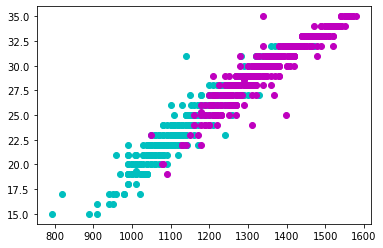

In [15]:
u=accept['SAT Total 25th Percentile']
v=accept['ACT Total 25th Percentile']
m=accept['SAT Total 75th Percentile']
n=accept['ACT Total 75th Percentile']
plt.plot(u,v,'co')
plt.plot(m,n,'mo')

# add bar plot

In [16]:
u.corr(v)

0.961835435084276

In [17]:
m.corr(n)

0.9413199682512434

We can see that the 25th Percentile has a higher correlation between SAT and ACT Score than the 75th Percentile. <br>
r >0.96 which suggest a strong linear realtionship between the 25th Percentile SAT and ACT score <br>
In next section, I try to use linear regression to fit in  model for 25th Percentile and then find outliers which deviate significantly from the expected value ( in other words, for a given 25th Percentile SAT score of a college, if the actual college acceptance 25th Percentile  ACT score is much lower than expected value, then students who want to apply for this college should ACT. otherwise, if actual ACT score is higher than expected, students should take SAT instead)

## Fitting Linear Model & Visialization

In [18]:
U = accept[['SAT Total 25th Percentile']]
lr = LinearRegression()
lr.fit(U, v)
coef=lr.coef_
incpt=lr.intercept_

Text(0, 0.5, 'ACT Total 25th Percentile')

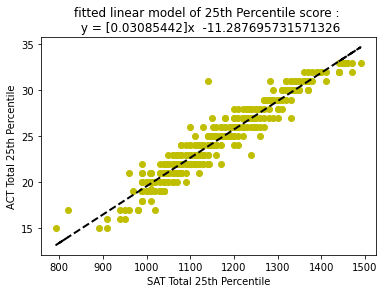

In [19]:
v_preds = lr.predict(U)
plt.scatter(U, v,color='y') 
plt.title(f'fitted linear model of 25th Percentile score : \n y = {coef}x  {incpt}')
plt.plot(u, v_preds, '--', color='black',linewidth=2)
plt.xlabel("SAT Total 25th Percentile")
plt.ylabel("ACT Total 25th Percentile")

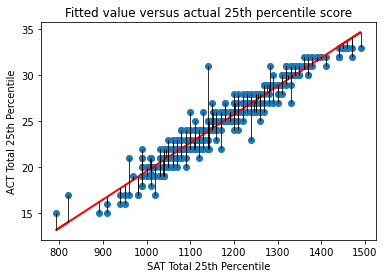

In [20]:
fig, ax = plt.subplots()
ax.plot(u,v_preds,color='red',linewidth=2)
ax.scatter(u,v)

ax.vlines(u,v,v_preds,color='black',linewidth=0.8)

plt.title("Fitted value versus actual 25th percentile score")
plt.xlabel("SAT Total 25th Percentile")
plt.ylabel("ACT Total 25th Percentile")

plt.show()

Text(0, 0.5, 'Residuals')

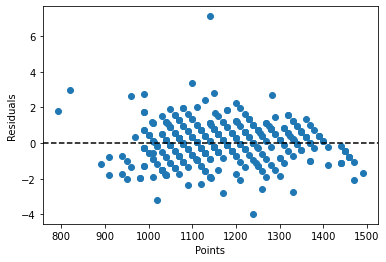

In [21]:
resids = v-v_preds
plt.scatter(u, resids)
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Points')
plt.ylabel('Residuals') 

In [22]:
x1 = u.values
y1 = v.values
lm = sm.OLS(y1, x1).fit()
# studentized_residuals = olsi(lm).resid_studentized


In [23]:
len(u)

401

Text(30.25, 0.5, 'ACT Total 25th Percentile')

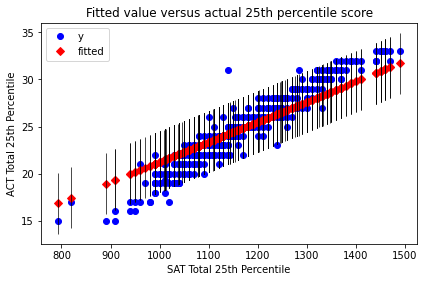

In [24]:
# fig = sm.graphics.plot_regress_exog(lm, 0)
fig = sm.graphics.plot_fit(lm,0)
fig.tight_layout(pad=1.0)
plt.title("Fitted value versus actual 25th percentile score")
plt.xlabel("SAT Total 25th Percentile")
plt.ylabel("ACT Total 25th Percentile")

## Standardized residuals
Standardized residuals (sometimes referred to as "internally studentized residuals") are defined for each observation, i = 1, ..., n as an ordinary residual divided by an estimate of its standard deviation:

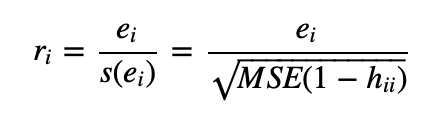

The standardized residual is the residual divided by its standard deviation for simple linear regression

In [25]:
# Producing studenterized residual
stud_res = lm.outlier_test()
df_stud_res= pd.DataFrame(stud_res, columns = ['student_resid','unadj_p','bonf(p)'])
df_stud_res

,student_resid,unadj_p,bonf(p)
0,0.828181,0.408063,1.0
1,1.178357,0.239357,1.0
2,0.828181,0.408063,1.0
3,1.308249,0.191542,1.0
4,1.178357,0.239357,1.0
...,...,...,...
396,-1.957274,0.051012,1.0
397,-1.253679,0.210693,1.0
398,-0.813196,0.416591,1.0
399,-0.335051,0.737763,1.0


Text(0, 0.5, 'Studentized Residuals')

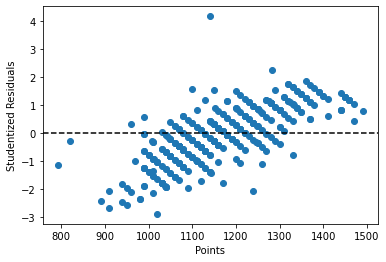

In [26]:

student_resid = df_stud_res.iloc[:,0]

plt.scatter(u, student_resid)
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Points')
plt.ylabel('Studentized Residuals') 

(array([ 1.,  1.,  1.,  4.,  0.,  4.,  5., 11.,  3.,  5., 10., 12., 10.,
        17., 14., 17., 19., 25., 28., 21., 17., 22., 17., 19., 15., 10.,
        21., 10., 25., 14.,  8.,  7.,  5.,  1.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-2.88102495, -2.73978009, -2.59853523, -2.45729038, -2.31604552,
        -2.17480066, -2.0335558 , -1.89231094, -1.75106608, -1.60982122,
        -1.46857637, -1.32733151, -1.18608665, -1.04484179, -0.90359693,
        -0.76235207, -0.62110721, -0.47986236, -0.3386175 , -0.19737264,
        -0.05612778,  0.08511708,  0.22636194,  0.3676068 ,  0.50885165,
         0.65009651,  0.79134137,  0.93258623,  1.07383109,  1.21507595,
         1.3563208 ,  1.49756566,  1.63881052,  1.78005538,  1.92130024,
         2.0625451 ,  2.20378996,  2.34503481,  2.48627967,  2.62752453,
         2.76876939,  2.91001425,  3.05125911,  3.19250397,  3.33374882,
         3.47499368,  3.61623854,  3.7574834 ,  3.89872826,

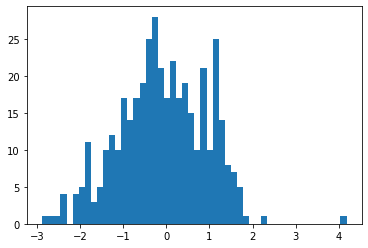

In [27]:

plt.hist(student_resid, bins=50)

In [28]:
accept = pd.concat([accept, student_resid], axis=1)
#accept

In [29]:
accept.sort_values('student_resid',ascending=True)

,School,SAT Total 25th Percentile,SAT Total 75th Percentile,ACT Total 25th Percentile,ACT Total 75th Percentile,student_resid
340,University of Alaska Anchorage,1020.0,1220.0,17.0,24.0,-2.881025
238,California State University--San Bernardino,910.0,1090.0,15.0,19.0,-2.668068
166,California State University--Fresno,950.0,1130.0,16.0,22.0,-2.575560
336,California State University--Sacramento,940.0,1140.0,16.0,22.0,-2.443420
95,California State University--Los Angeles,890.0,1080.0,15.0,20.0,-2.403675
...,...,...,...,...,...,...
58,Villanova University,1320.0,1470.0,31.0,34.0,1.776829
38,Wesleyan University,1320.0,1510.0,31.0,34.0,1.776829
32,Middlebury College,1360.0,1530.0,32.0,34.0,1.868560
35,The Cooper Union,1283.0,1510.0,31.0,34.0,2.261784


## Find Outliers

An observation with a standardized residual that is larger than 3 (in absolute value) is deemed by some to be an outlier. <br>
Some statistical software flags any observation with a standardized residual that is larger than 2 (in absolute value). <br>
(reference: https://online.stat.psu.edu/stat462/node/172/)

In [30]:
# Outliers

otl_higherACT = accept.loc[accept['student_resid']>3, :]
otl_lowerACT = accept.loc[accept['student_resid']< -3, :]
otl_higherACT
# otl_lowerACT is empty

,School,SAT Total 25th Percentile,SAT Total 75th Percentile,ACT Total 25th Percentile,ACT Total 75th Percentile,student_resid
304,Willamette University,1140.0,1340.0,31.0,35.0,4.181218


## Result

Here we set the benchmark of standardized residual is absolute value > 2

In [31]:
Sch_prefer_ACT = accept.loc[accept['student_resid'] < -2, :].sort_values('student_resid',ascending=True)
Sch_prefer_SAT = accept.loc[accept['student_resid'] > 2, :].sort_values('student_resid',ascending=False)

### List of schools prefer ACT
Below list is of school with lower ACT 25th Percentile score than SAT 25th Percentile score. 
In orther words, these schools prefer ACT. 

In [32]:
Sch_prefer_ACT 

,School,SAT Total 25th Percentile,SAT Total 75th Percentile,ACT Total 25th Percentile,ACT Total 75th Percentile,student_resid
340,University of Alaska Anchorage,1020.0,1220.0,17.0,24.0,-2.881025
238,California State University--San Bernardino,910.0,1090.0,15.0,19.0,-2.668068
166,California State University--Fresno,950.0,1130.0,16.0,22.0,-2.575560
336,California State University--Sacramento,940.0,1140.0,16.0,22.0,-2.443420
95,California State University--Los Angeles,890.0,1080.0,15.0,20.0,-2.403675
259,University of California—Merced,980.0,1180.0,17.0,22.0,-2.351282
365,Humboldt State University,980.0,1190.0,17.0,25.0,-2.351282
373,Portland State,1010.0,1230.0,18.0,25.0,-2.127858
289,California State University--Monterey Bay,960.0,1170.0,17.0,23.0,-2.088332
388,Florida International,1240.0,1300.0,23.0,28.0,-2.063125


### List of schools prefer SAT
Below list is of school with higher ACT 25th Percentile score than SAT 25th Percentile score. 
In orther words, these schools prefer SAT. Among the list, the Willamette University has student_resid>3, which indicates that it does not really fit in our modle. Thus I strongly encourage who want to apply Willamette University take SAT rather than ACT

In [33]:
Sch_prefer_SAT

,School,SAT Total 25th Percentile,SAT Total 75th Percentile,ACT Total 25th Percentile,ACT Total 75th Percentile,student_resid
304,Willamette University,1140.0,1340.0,31.0,35.0,4.181218
35,The Cooper Union,1283.0,1510.0,31.0,34.0,2.261784


In [34]:
"""
leverage_pts = olsi(lm).hat_matrix_diag
cook_dist = olsi(lm).cooks_distance

fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(lm, alpha  = 0.05, ax = ax, criterion="cooks")
"""

'\nleverage_pts = olsi(lm).hat_matrix_diag\ncook_dist = olsi(lm).cooks_distance\n\nfig, ax = plt.subplots(figsize=(12,8))\nfig = sm.graphics.influence_plot(lm, alpha  = 0.05, ax = ax, criterion="cooks")\n'

# Part 2

## EDA

In [35]:
x = sat['Total SAT']
y = act['Avg ACT Composite Score']

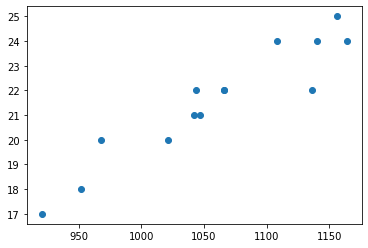

In [36]:
plt.plot(x,y,'o')

In [37]:
x.corr(y)

#>0.5 : strong linear relation

0.9419327522416332

In [38]:
x

0      968.00
1     1042.00
2     1047.00
3     1066.00
4     1066.00
5      952.00
6     1156.00
7     1021.00
8     1140.00
9     1108.50
10    1044.00
11     921.00
12    1163.75
13    1136.50
Name: Total SAT, dtype: float64

# Fitting Linear Model & Visialization

Part 1: Average SAT (x) vs ACT score (y) based on tast takers' intended majors

In [39]:
def objective(x, a, b):
    return a * x + b

In [40]:
popt, _ = curve_fit(objective, x, y)

# summarize the parameter values
a, b = popt

print(f'fitted linear model is : y = {a:.5f}x  {b:.5f}')

fitted linear model is : y = 0.02840x  -8.51634


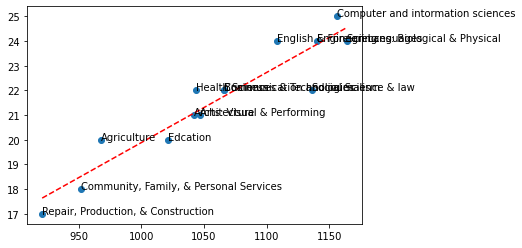

In [41]:
# define a sequence of inputs between the smallest and largest known inputs
x_line = np.arange(min(x), max(x), 1)

# calculate the output for the range
y_line = objective(x_line, a, b)

# create a line plot for the mapping function
plt.plot(x,y,'o')
plt.plot(x_line, y_line, '--', color='red')

annotations= sat['Degree-level goal and intended college major']
    
for i, label in enumerate(annotations):
    plt.annotate(label, (x[i], y[i]))
    
plt.show()

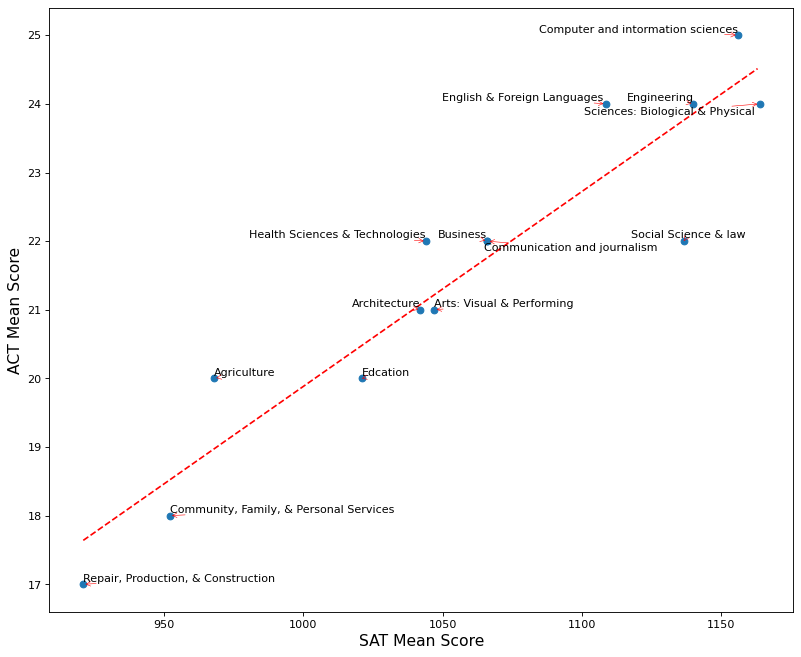

In [42]:
# Before run this section, please install adjustText (uncomment below code)

#!pip install numpy

# credit to https://github.com/Phlya/adjustText
# In order to ajust text label to avoid overlapping


from adjustText import adjust_text

plt.figure(figsize=(12, 10), dpi=80)

plt.plot(x,y,'o')
plt.plot(x_line, y_line, '--', color='red')

annotations= sat['Degree-level goal and intended college major']

x_copy=x.copy(deep=True)
y_copy=y.copy(deep=True)
    
texts = []
for xs, ys, s in zip(x_copy, y_copy, annotations):
    texts.append(plt.text(xs, ys, s))

plt.ylabel("ACT Mean Score", fontsize = 14);
plt.xlabel("SAT Mean Score", fontsize = 14);

adjust_text(texts, only_move={'points':'y', 'texts':'y'}, arrowprops=dict(arrowstyle="->", color='r', lw=0.5))
plt.show()

In [43]:
X2 = sm.add_constant(x)
est = sm.OLS(y, X2)
est2 = est.fit() 
print(est2.summary())

                               OLS Regression Results                              
Dep. Variable:     Avg ACT Composite Score   R-squared:                       0.887
Model:                                 OLS   Adj. R-squared:                  0.878
Method:                      Least Squares   F-statistic:                     94.42
Date:                     Mon, 26 Sep 2022   Prob (F-statistic):           4.88e-07
Time:                             03:13:56   Log-Likelihood:                -15.797
No. Observations:                       14   AIC:                             35.59
Df Residuals:                           12   BIC:                             36.87
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
co

/Users/zhangzhexu/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Part 2: 25 percentile acceptance SAT (x) vs ACT score (y) based on universities.


In [44]:
"""
X = sat[['Total SAT']]
Y = act['Avg ACT Composite Score']
lr = LinearRegression()
lr.fit(X, Y)
print(lr.intercept_)
print(lr.coef_)


plt.scatter(X, Y, s=1)
plt.plot(x, y_pred, color='orange');


# Make predictions
y_pred = lr.predict(X)

# Create residuals (aka errors): (y - y_hat)
resids = y - y_line

# Compute the MSE
mse = np.mean(resids**2)
mse

"""

"\nX = sat[['Total SAT']]\nY = act['Avg ACT Composite Score']\nlr = LinearRegression()\nlr.fit(X, Y)\nprint(lr.intercept_)\nprint(lr.coef_)\n\n\nplt.scatter(X, Y, s=1)\nplt.plot(x, y_pred, color='orange');\n\n\n# Make predictions\ny_pred = lr.predict(X)\n\n# Create residuals (aka errors): (y - y_hat)\nresids = y - y_line\n\n# Compute the MSE\nmse = np.mean(resids**2)\nmse\n\n"

In [45]:
# MSE
metrics.mean_squared_error(y, y_pred)

NameError: name 'y_pred' is not defined

In [ ]:
# N - Normality of errors
plt.hist(y-objective(x,a,b), bins=50)
for ys, s in zip(y-objective(x,a,b), annotations):
    texts.append(plt.text(xs, ys, s))

In [ ]:
x1 = x.values
y1 = y.values
lm = sm.OLS(y1, x1).fit()
studentized_residuals = olsi(lm).resid_studentized
leverage_pts = olsi(lm).hat_matrix_diag
cook_dist = olsi(lm).cooks_distance

fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(lm, alpha  = 0.05, ax = ax, criterion="cooks")